In [16]:
import numpy as np
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt

In [8]:
# Problem 1
'''
y(-1) = 1
y(1) = 7
u_t = -1 - y'^2 + y*y", x in (a,b)
u(x,0) = g(x)
u(a,t) = y_a, u(b,t) = y_b
'''
a, b = -1, 1
X = np.linspace(a, b, 21)
dx = X[1] - X[0]
T = np.linspace(0,.2,251)
dt = T[1] - T[0]
stability_condition = (dt)/((dx)**2)
print('Stability Condition: {:.2f} <= .5, {}'.format(stability_condition, stability_condition<=.5))

Stability Condition: 0.08 <= .5, True


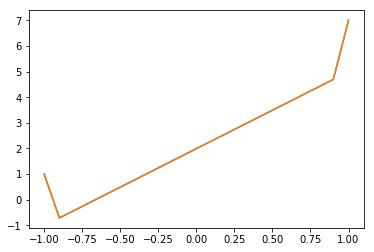

In [17]:
y0 = (lambda x: 4 + x*3)(X)
y = y0
yp = (np.roll(y,-1) - np.roll(y,1))[1:-1]/(2*dx)
ypp = (np.roll(y,-1) - 2*y + np.roll(y,1))[1:-1]/(dx**2)
yt = -1 - yp**2 + y[1:-1]*ypp

for t in T:
    y[1:-1] += dt*yt
plt.plot(X,y0)
plt.plot(X,y)
plt.show()

In [14]:
yt.shape

(19,)